<a href="https://colab.research.google.com/github/tigermcrae/Fraud-Detection-in-Electricity-and-Gas/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [75]:
# Reading traininig data
client_train = pd.read_csv('/content/client_train.csv')
invoice_train = pd.read_csv('/content/invoice_train.csv')

client_test = pd.read_csv('/content/client_test.csv')
invoice_test = pd.read_csv('/content/invoice_test.csv')

In [ ]:
invoice_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tarif_type,905088.0,2.013202e+01,1.347833e+01,8.0,11.0,11.0,40.00,4.500000e+01
counter_number,905088.0,1.187276e+11,1.627104e+12,0.0,122485.0,492850.0,1112725.00,2.738110e+13
counter_statue,905088.0,4.221689e-02,3.749131e-01,0.0,0.0,0.0,0.00,5.000000e+00
counter_code,905088.0,1.722914e+02,1.335667e+02,5.0,5.0,203.0,207.00,6.000000e+02
reading_remarque,905088.0,7.316536e+00,1.360196e+00,6.0,6.0,6.0,9.00,9.000000e+00
counter_coefficient,905088.0,1.000274e+00,8.940093e-02,0.0,1.0,1.0,1.00,5.000000e+01
consommation_level_1,905088.0,4.096011e+02,5.904254e+02,0.0,79.0,272.0,600.00,9.888900e+04
consommation_level_2,905088.0,1.080290e+02,1.223991e+03,0.0,0.0,0.0,0.00,8.198860e+05
consommation_level_3,905088.0,2.045359e+01,1.685216e+02,0.0,0.0,0.0,0.00,4.536000e+04
consommation_level_4,905088.0,5.382319e+01,9.897337e+02,0.0,0.0,0.0,0.00,3.435680e+05


In [ ]:
print(client_train.shape, invoice_train.shape)

(96907, 6) (905089, 16)


In [ ]:
print(client_train.columns, client_test.columns)

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object') Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date'], dtype='object')


In [ ]:
client_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disrict,58069.0,63.510617,3.356708,60.0,62.0,62.0,69.0,69.0
client_catg,58069.0,11.507224,4.395923,11.0,11.0,11.0,11.0,51.0
region,58069.0,206.018461,104.144028,101.0,103.0,107.0,307.0,399.0


In [ ]:
invoice_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tarif_type,905088.0,2.013202e+01,1.347833e+01,8.0,11.0,11.0,40.00,4.500000e+01
counter_number,905088.0,1.187276e+11,1.627104e+12,0.0,122485.0,492850.0,1112725.00,2.738110e+13
counter_statue,905088.0,4.221689e-02,3.749131e-01,0.0,0.0,0.0,0.00,5.000000e+00
counter_code,905088.0,1.722914e+02,1.335667e+02,5.0,5.0,203.0,207.00,6.000000e+02
reading_remarque,905088.0,7.316536e+00,1.360196e+00,6.0,6.0,6.0,9.00,9.000000e+00
counter_coefficient,905088.0,1.000274e+00,8.940093e-02,0.0,1.0,1.0,1.00,5.000000e+01
consommation_level_1,905088.0,4.096011e+02,5.904254e+02,0.0,79.0,272.0,600.00,9.888900e+04
consommation_level_2,905088.0,1.080290e+02,1.223991e+03,0.0,0.0,0.0,0.00,8.198860e+05
consommation_level_3,905088.0,2.045359e+01,1.685216e+02,0.0,0.0,0.0,0.00,4.536000e+04
consommation_level_4,905088.0,5.382319e+01,9.897337e+02,0.0,0.0,0.0,0.00,3.435680e+05


In [ ]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11.0,101.0,31/12/1994,0.0
1,69,train_Client_1,11.0,107.0,29/05/2002,0.0
2,62,train_Client_10,11.0,301.0,13/03/1986,0.0
3,69,train_Client_100,11.0,105.0,11/07/1996,0.0
4,62,train_Client_1000,11.0,303.0,14/10/2014,0.0


In [76]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11.0,1335667.0,0.0,203.0,8.0,1.0,82.0,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC
1,train_Client_0,2013-03-29,11.0,1335667.0,0.0,203.0,6.0,1.0,1200.0,184.0,0.0,0.0,12294.0,13678.0,4.0,ELEC
2,train_Client_0,2015-03-23,11.0,1335667.0,0.0,203.0,8.0,1.0,123.0,0.0,0.0,0.0,14624.0,14747.0,4.0,ELEC
3,train_Client_0,2015-07-13,11.0,1335667.0,0.0,207.0,8.0,1.0,102.0,0.0,0.0,0.0,14747.0,14849.0,4.0,ELEC
4,train_Client_0,2016-11-17,11.0,1335667.0,0.0,207.0,9.0,1.0,572.0,0.0,0.0,0.0,15066.0,15638.0,12.0,ELEC


In [ ]:
#Checking null values
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [ ]:
client_train = client_train.dropna()

In [ ]:
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [ ]:
invoice_train.isnull().sum()

client_id               0
invoice_date            1
tarif_type              1
counter_number          1
counter_statue          1
counter_code            1
reading_remarque        1
counter_coefficient     1
consommation_level_1    1
consommation_level_2    1
consommation_level_3    1
consommation_level_4    1
old_index               1
new_index               1
months_number           1
counter_type            1
dtype: int64

In [ ]:
invoice_train = invoice_train.dropna

In [71]:
client_train.duplicated().sum()

0

In [77]:
invoice_train.duplicated().sum()

0

In [78]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905089 entries, 0 to 905088
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             905089 non-null  object 
 1   invoice_date          905088 non-null  object 
 2   tarif_type            905088 non-null  float64
 3   counter_number        905088 non-null  float64
 4   counter_statue        905088 non-null  float64
 5   counter_code          905088 non-null  float64
 6   reading_remarque      905088 non-null  float64
 7   counter_coefficient   905088 non-null  float64
 8   consommation_level_1  905088 non-null  float64
 9   consommation_level_2  905088 non-null  float64
 10  consommation_level_3  905088 non-null  float64
 11  consommation_level_4  905088 non-null  float64
 12  old_index             905088 non-null  float64
 13  new_index             905088 non-null  float64
 14  months_number         905088 non-null  float64
 15  

In [79]:
invoice_train.isnull().sum()

client_id               0
invoice_date            1
tarif_type              1
counter_number          1
counter_statue          1
counter_code            1
reading_remarque        1
counter_coefficient     1
consommation_level_1    1
consommation_level_2    1
consommation_level_3    1
consommation_level_4    1
old_index               1
new_index               1
months_number           1
counter_type            1
dtype: int64

In [82]:
invoice_train = invoice_train.dropna()

In [84]:
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

invoice_train.head()

In [85]:
client_train.isnull()

,disrict,client_id,client_catg,region,creation_date,target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
96902,False,False,False,False,False,False
96903,False,False,False,False,False,False
96904,False,False,False,False,False,False
96905,False,False,False,False,False,False


In [87]:
client_train = client_train.dropna()

In [88]:
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [90]:
client_train.duplicated().sum()

0

In [91]:
invoice_train.duplicated().sum()

0

<Axes: xlabel='target', ylabel='count'>

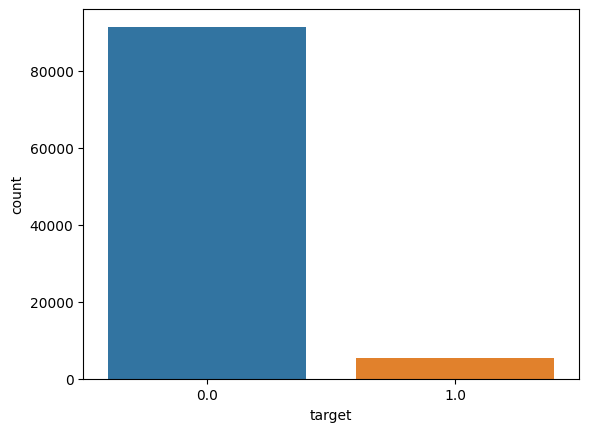

In [92]:
sns.countplot(x='target', data=client_train)

In [93]:
#heatmap corelations
client_train.corr()

,disrict,client_catg,region,target
disrict,1.000000,0.032456,-0.312136,0.052971
client_catg,0.032456,1.000000,-0.039275,0.061082
region,-0.312136,-0.039275,1.000000,0.010020
target,0.052971,0.061082,0.010020,1.000000


Text(0.5, 1.0, 'Client Correlations')

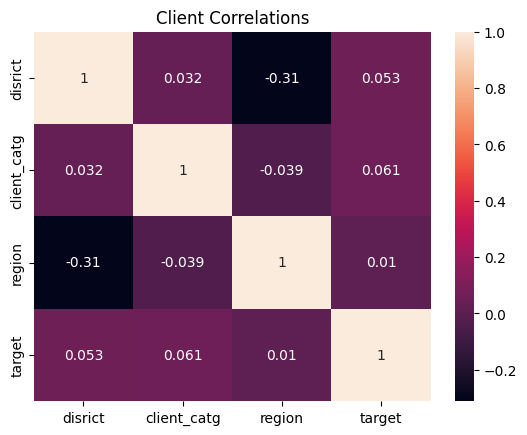

In [95]:
sns.heatmap(client_train.corr(),annot=True)
plt.title('Client Correlations')

<Axes: >

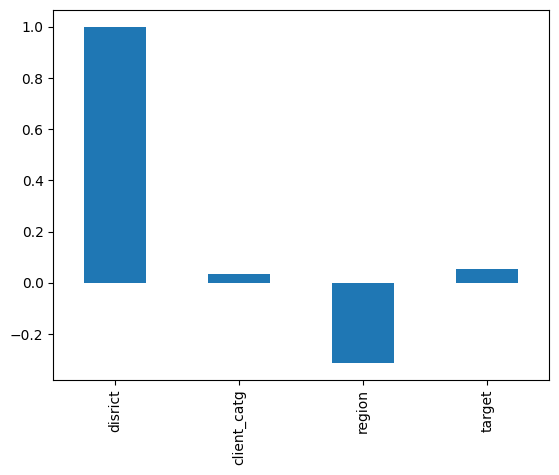

In [117]:
client_train.corr()['disrict'].plot(kind='bar')

Text(0.5, 1.0, 'Client Correlations')

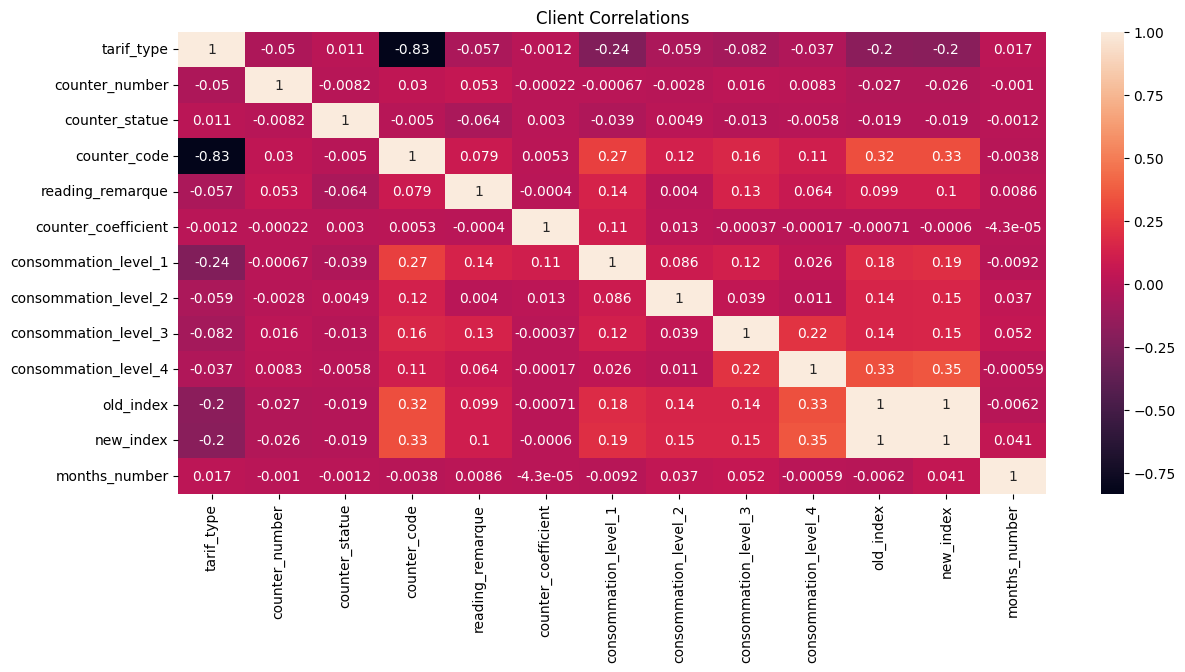

In [111]:
plt.figure(figsize=(14,6))
sns.heatmap(invoice_train.corr(),annot=True)
plt.title('Client Correlations')

In [112]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96906 entries, 0 to 96905
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   disrict        96906 non-null  int64  
 1   client_id      96906 non-null  object 
 2   client_catg    96906 non-null  float64
 3   region         96906 non-null  float64
 4   creation_date  96906 non-null  object 
 5   target         96906 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.2+ MB


In [118]:
client_train = client_train.drop('client_id', axis=1)

In [119]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96906 entries, 0 to 96905
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   disrict        96906 non-null  int64  
 1   client_catg    96906 non-null  float64
 2   region         96906 non-null  float64
 3   creation_date  96906 non-null  object 
 4   target         96906 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.4+ MB


In [121]:
df = pd.concat([client_train, invoice_train],axis=1)

In [123]:
df.head()

,disrict,client_catg,region,creation_date,target,client_id,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60.0,11.0,101.0,31/12/1994,0.0,train_Client_0,2014-03-24,11.0,1335667.0,0.0,...,8.0,1.0,82.0,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC
1,69.0,11.0,107.0,29/05/2002,0.0,train_Client_0,2013-03-29,11.0,1335667.0,0.0,...,6.0,1.0,1200.0,184.0,0.0,0.0,12294.0,13678.0,4.0,ELEC
2,62.0,11.0,301.0,13/03/1986,0.0,train_Client_0,2015-03-23,11.0,1335667.0,0.0,...,8.0,1.0,123.0,0.0,0.0,0.0,14624.0,14747.0,4.0,ELEC
3,69.0,11.0,105.0,11/07/1996,0.0,train_Client_0,2015-07-13,11.0,1335667.0,0.0,...,8.0,1.0,102.0,0.0,0.0,0.0,14747.0,14849.0,4.0,ELEC
4,62.0,11.0,303.0,14/10/2014,0.0,train_Client_0,2016-11-17,11.0,1335667.0,0.0,...,9.0,1.0,572.0,0.0,0.0,0.0,15066.0,15638.0,12.0,ELEC


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905088 entries, 0 to 905087
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disrict               96906 non-null   float64
 1   client_catg           96906 non-null   float64
 2   region                96906 non-null   float64
 3   creation_date         96906 non-null   object 
 4   target                96906 non-null   float64
 5   client_id             905088 non-null  object 
 6   invoice_date          905088 non-null  object 
 7   tarif_type            905088 non-null  float64
 8   counter_number        905088 non-null  float64
 9   counter_statue        905088 non-null  float64
 10  counter_code          905088 non-null  float64
 11  reading_remarque      905088 non-null  float64
 12  counter_coefficient   905088 non-null  float64
 13  consommation_level_1  905088 non-null  float64
 14  consommation_level_2  905088 non-null  float64
 15  

In [125]:
df['months_number']

0          4.0
1          4.0
2          4.0
3          4.0
4         12.0
          ... 
905083     4.0
905084     8.0
905085     4.0
905086     2.0
905087     4.0
Name: months_number, Length: 905088, dtype: float64

In [ ]:
#district with fradulent and non fradulent activities

<Axes: xlabel='disrict', ylabel='count'>

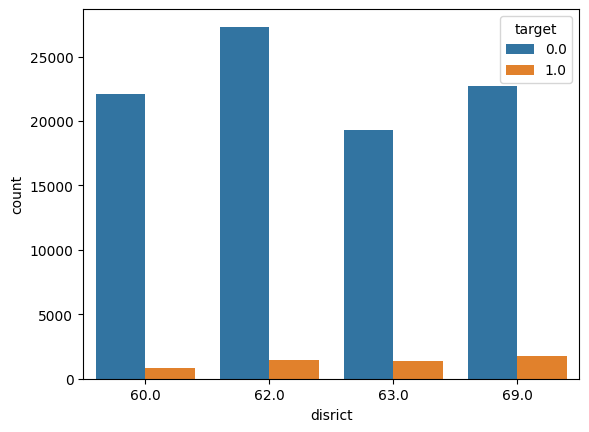

In [126]:
sns.countplot(x='disrict', data=df, hue='target')